In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Check if the data is loaded correctly
print("Data loaded successfully:")
print(data.head())

Data loaded successfully:
   Heavy / Extreme menstrual bleeding  Menstrual pain (Dysmenorrhea)  \
0                                   1                              1   
1                                   1                              1   
2                                   0                              1   
3                                   1                              0   
4                                   0                              1   

   Painful / Burning pain during sex (Dyspareunia)  Pelvic pain  \
0                                                1            1   
1                                                1            1   
2                                                0            1   
3                                                0            0   
4                                                1            0   

   Irregular / Missed periods  Cramping  Abdominal pain / pressure  Back pain  \
0                           1         1                  

In [4]:
# Separate features and target label
X = data.drop(columns='label')
y = data['label']

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(kernel='rbf', gamma='auto', probability=True, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)


In [7]:
# Define the voting classifiers
soft_voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('decision_tree', dt_classifier),
    ('gradient_boosting', gb_classifier)
], voting='soft')  # 'soft' voting uses predicted probabilities for averaging

hard_voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('decision_tree', dt_classifier),
    ('gradient_boosting', gb_classifier)
], voting='hard')  # 'hard' voting uses predicted class labels for majority rule voting


In [8]:
# Train the classifiers
soft_voting_classifier.fit(X_train, y_train)
hard_voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma='auto', probability=True,
                                  random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42))])

In [9]:
# Predictions
y_pred_soft_voting = soft_voting_classifier.predict(X_test)
y_pred_hard_voting = hard_voting_classifier.predict(X_test)


In [10]:
# Probability estimates for ROC AUC
soft_voting_probs = soft_voting_classifier.predict_proba(X_test)[:, 1]


In [11]:
# Evaluate metrics
soft_voting_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_soft_voting),
    'Precision': precision_score(y_test, y_pred_soft_voting),
    'Recall': recall_score(y_test, y_pred_soft_voting),
    'F1 Score': f1_score(y_test, y_pred_soft_voting),
    'ROC AUC': roc_auc_score(y_test, soft_voting_probs)
}

hard_voting_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_hard_voting),
    'Precision': precision_score(y_test, y_pred_hard_voting),
    'Recall': recall_score(y_test, y_pred_hard_voting),
    'F1 Score': f1_score(y_test, y_pred_hard_voting),
    'ROC AUC': roc_auc_score(y_test, y_pred_hard_voting)  # This might not be valid for hard voting
}

In [12]:
# Print metrics for debugging
print("Soft Voting Metrics:", soft_voting_metrics)
print("Hard Voting Metrics:", hard_voting_metrics)

Soft Voting Metrics: {'Accuracy': 0.9213483146067416, 'Precision': 0.96875, 'Recall': 0.8942307692307693, 'F1 Score': 0.93, 'ROC AUC': 0.9797297297297298}
Hard Voting Metrics: {'Accuracy': 0.9157303370786517, 'Precision': 0.968421052631579, 'Recall': 0.8846153846153846, 'F1 Score': 0.9246231155778896, 'ROC AUC': 0.922037422037422}


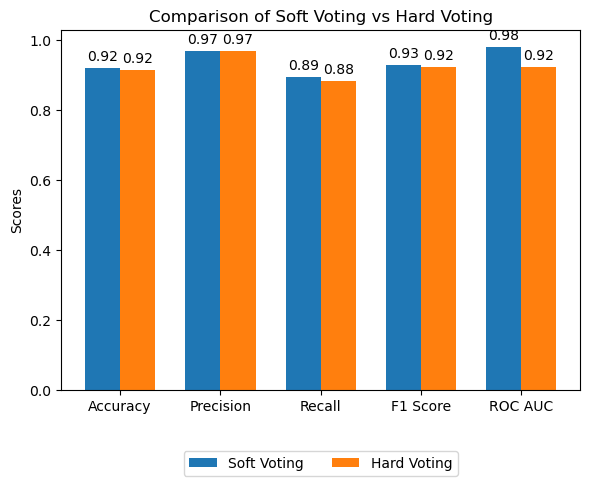

In [13]:
# Plotting bar graph
metrics_names = list(soft_voting_metrics.keys())
soft_voting_values = list(soft_voting_metrics.values())
hard_voting_values = list(hard_voting_metrics.values())

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
rects1 = ax.bar(x - width/2, soft_voting_values, width, label='Soft Voting')
rects2 = ax.bar(x + width/2, hard_voting_values, width, label='Hard Voting')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Soft Voting vs Hard Voting')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



In [14]:
# Print metrics for soft voting
print("Metrics for Soft Voting Classifier (SVM, DT, GB):")
for metric, value in soft_voting_metrics.items():
    print(f"{metric}: {value:.4f}")

# Print metrics for hard voting
print("\nMetrics for Hard Voting Classifier (SVM, DT, GB):")
for metric, value in hard_voting_metrics.items():
    print(f"{metric}: {value:.4f}")

# Determine the best model based on all metrics
if soft_voting_metrics['Accuracy'] > hard_voting_metrics['Accuracy']:
    print("\nBest model based on Accuracy: Soft Voting Classifier")
else:
    print("\nBest model based on Accuracy: Hard Voting Classifier")

Metrics for Soft Voting Classifier (SVM, DT, GB):
Accuracy: 0.9213
Precision: 0.9688
Recall: 0.8942
F1 Score: 0.9300
ROC AUC: 0.9797

Metrics for Hard Voting Classifier (SVM, DT, GB):
Accuracy: 0.9157
Precision: 0.9684
Recall: 0.8846
F1 Score: 0.9246
ROC AUC: 0.9220

Best model based on Accuracy: Soft Voting Classifier
